## Introduction de la triplet loss pour l'apprentissage



Nous proposons l'exercice suivant:

1. Générer des points 2D aléatoirement et uniformément répartis dans un espace (par exemple $[0,1]^2$)
2. Associer une couleur aléatoire à chaque point sous la forme de 3 coordonnées dans $[0,1]$ (RGB)
3. Afficher les points coloré avec un scatter plot
4. Construire un index des points plutot vert ou pas vert (avec un seuil). Faire de même pour le rouge, et le bleu
5. Sur la base du modèle fourni en début de TP, construire un dataloader qui donne 2 points plutot dans la couleur et 1 à l'opposé
6. Construire une fonction d'apprentissage qui exploite la *triplet loss* pour structurer notre espace (faire bouger les coordonnées des points)
7. Visualiser le résultat

### 1. Données brutes

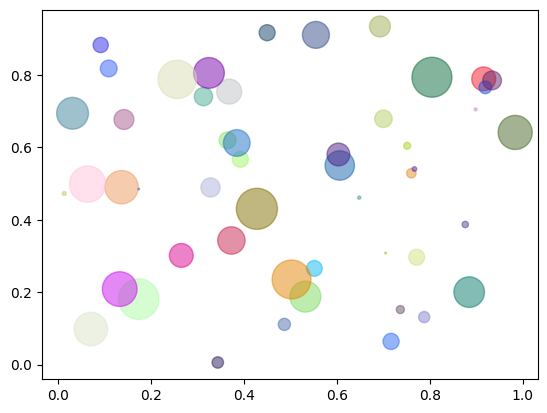

In [ ]:
# exemple pour la génération de points colorés

import matplotlib.pyplot as plt
import numpy as np
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N,3) # tirage aléatoire RGB
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


### 2. Hypothèse de regroupement

Travailler sur la couleur majoritaire dans le jeu de données

In [ ]:

# construire le même jeu en pytorch ou transferer les points en pytorch
N = 100

X = torch.rand(N,2)
X.requires_grad = True
C = torch.rand(N,3) # tirage aléatoire RGB

# si X contient les coordonnées (N,2)
# et C les couleurs (N,3)
# la commande suivante fait l'affichage

facile = True
if facile:
    # pour faire des données plus faciles : soit rouge, soit verte, soit bleu   
    indc = C.argmax(1)
    C2 = torch.zeros(N,3)
    for i,j in enumerate(indc): C2[i,j]=1
    C = C2

plt.scatter(X[:,0].detach(), X[:,1].detach(), c=C.numpy(), alpha=0.5)


In [ ]:
# Construction d'un jeu données permettant de délivrer à chaque étape:
# 1 point de référence
# 1 point de la même couleur
# un point aléatoire

class ColorsDataset:
    def __init__(self,data, colors, thres=0.4):
        """ data : (game, user, note) """
        self.data = data
        self.colors = colors
        self.thres =thres

        self.ired = colors[:,0]>1-thres
        self.ired = self.ired.nonzero()
        self.igreen = colors[:,1]>1-thres
        self.igreen = self.igreen.nonzero()
        self.iblue = colors[:,2]>1-thres
        self.iblue = self.iblue.nonzero()

        self.stat = []

    def __getitem__(self,i):
        # tirer une couleur
        c = torch.rand(1).item()
        # print(i)
        if c<0.33:
            ind1 = self.ired[i%len(self.ired)]
            ind2 = self.ired[torch.randint(len(self.ired), (1,1)).item()]
            # ind2 = self.ired[(i+1) %len(self.ired)]
        elif c<0.66:
            ind1 = self.igreen[i%len(self.igreen)]
            ind2 = self.igreen[torch.randint(len(self.igreen), (1,1)).item()]
            # ind2 = self.igreen[(i+1) %len(self.igreen)]
        else:
            ind1 = self.iblue[i%len(self.iblue)]
            ind2 = self.iblue[torch.randint(len(self.iblue), (1,1)).item()]

            # ind2 = self.iblue[(i+1) %len(self.iblue)]
        ind3 = torch.randint(len(self.data), (1,1)).squeeze(0)
        
        self.stat += [ind1.item(), ind2.item(), ind3.item()]
        # print(ind1, ind2, ind3)
        return self.data[ind1][0],self.data[ind2][0],self.data[ind3][0] #, ind1, ind2, ind3
    def __len__(self):
        return len(self.data)


In [ ]:
# Verification
# 1. Construction de l'objet
data = ColorsDataset(X,C)

# 2. Tirage d'un triplet
xr, xp, xn = data.__getitem__(0)
print(xr, xp, xn, )
print(xr.size(), xp.size(), xn.size() )

In [ ]:
# affichage de la triplet loss

def plotsc(X,G, C):
    plt.scatter(X[:,0], X[:,1], c=C, alpha=0.5)
    for i in range(len(X)):
        if (G[i]**2).sum()>1e-3:
            plt.quiver(X[i,0], X[i,1], -G[i,0], -G[i,1])

# illustration de la triplet loss
X.grad = torch.zeros(X.data.size())
xr, xp, xn = data.__getitem__(0)
delta = nn.TripletMarginLoss()(xr, xp, xn)
delta.backward()

with torch.no_grad():
    plotsc(X.numpy(),X.grad.numpy(), C.numpy())
    xr = xr.numpy()
    plt.text(xr[0], xr[1], "R")
    xp = xp.numpy()
    plt.text(xp[0], xp[1], "P")
    xn = xn.numpy()
    plt.text(xn[0], xn[1], "N")

In [ ]:
# boucle d'apprentissage

# Paramétrage
dload = DataLoader(data, batch_size=16,shuffle=True)
nb_epochs = 200
lr=3e-1
loss = nn.TripletMarginLoss()

# Boucle d'apprentissage
#   1. Tirer un batch
#   2. Calculer la loss
#   3. Retropropager
#   4. MAJ (attention, il faut le faire sur toute la matrice... Mais laquelle?)
#   5. Mise à Zero des gradients 
for epoch in range(nb_epochs):
    #  TODO 



In [ ]:
#  TODO 


In [ ]:
# vérification graphique

plt.scatter(X[:,0].detach(), X[:,1].detach(), c=C.numpy(), alpha=0.5)
 

In [ ]:
###  TODO )"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

### </CORRECTION> ###